In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

In [2]:
M = 100
lr = 0.1
batch_size = 1024

methods = ["FO", "SO", "Rnd", "exact", "MC", "BayesianNB"]
bound = "seeger"
max_depth = None

datasets = "PENDIGITS SHUTTLE SENSORLESS PROTEIN MNIST FASHION"
datasets = datasets.split(" ")

ns = [7494, 43500, 46807, 17766, 60000, 60000]
dims = [16, 9, 48, 357, 784, 784]

results = {}
for d in datasets:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/multic/{d}/{m}/")
        
        try:
            if m == "BayesianNB":
                path = next(load_dir.rglob(f"**/err-b.npy"))
            else:
                path = next(load_dir.rglob(f"{bound}/**/stochastic-bound=False/**/M={M}/**/max-depth={max_depth}/**/err-b.npy"))
            results[d][m] = np.load(path, allow_pickle=True).item()
        except:
            print("Missing", load_dir, M)

In [3]:
results["FASHION-MNIST"] = results["FASHION"]
methods = ["FO", "SO", "Rnd", "exact", "MC"]

datasets = "PENDIGITS SHUTTLE SENSORLESS PROTEIN MNIST FASHION-MNIST"
datasets = datasets.split(" ")

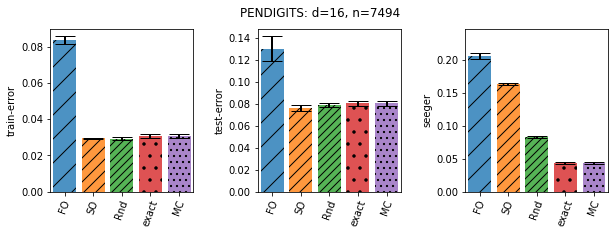

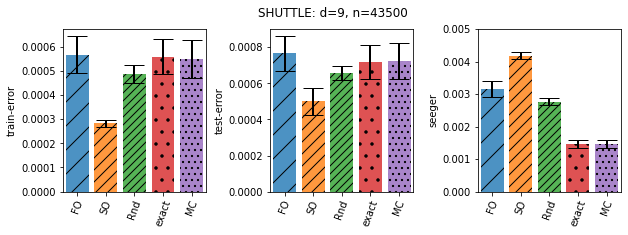

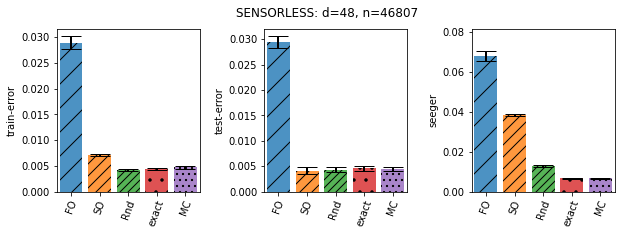

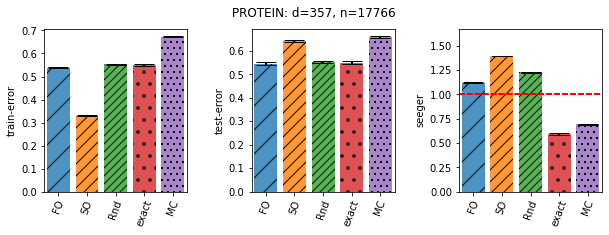

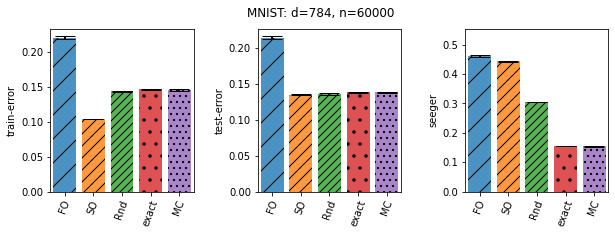

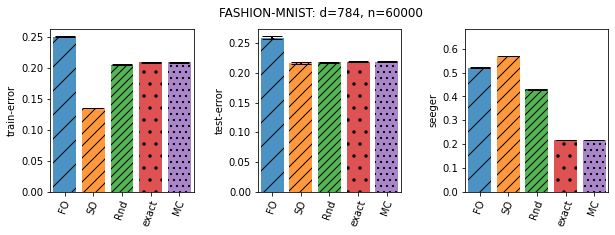

In [7]:
hatches = ["/", "//", "///", ".", "..", "..."]
methods = ["FO", "SO", "Rnd", "exact", "MC"]
for d, s, n in zip(datasets, dims, ns):
    
    plt.figure(figsize=(10,3))
    for j, y in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)

        for i, (m, h) in enumerate(zip(methods, hatches)):
            
            try:
                plt.bar(i, results[d][m][y][0], yerr=results[d][m][y][1], label=m, alpha=0.8, hatch=h, error_kw=dict(lw=2, capsize=10, capthick=1))
                plt.ylabel(y)
                
                if y == bound:
                    plt.plot([-0.5, len(methods)-0.5], [1, 1], linestyle='dashed', c="r")
                    plt.ylim(0, max([results[d][m][y][0] for m in methods])*1.2)
            except Exception as e:
                print(e)

        ax.set_xticks(range(len(methods)))
        ax.set_xticklabels(methods, rotation=70)
        plt.xlim(-0.5, len(methods)-0.5)
        plt.subplots_adjust(wspace=0.45)
        
    plt.suptitle(f"{d}: d={s}, n={n}")
    plt.savefig(f"{d}.pdf", bbox_inches="tight")

In [24]:
def draw_bars(datasets):
    
    x_pos = np.linspace(0, 0.75*len(methods), len(methods))
    step = len(methods)
    
    plt.figure(figsize=(6, 6))
    b = "seeger"
    
    for i, d in enumerate(datasets):
        ax = plt.subplot(2, 3, i + 1)
        test_errors = ([results[d][m]["test-error"][0] for m in methods], [results[d][m]["test-error"][1] for m in methods])
        bounds = ([results[d][m][b][0] for m in methods], [results[d][m][b][1] for m in methods])

        plt.bar(x_pos, bounds[0], yerr=bounds[1], alpha=0.8, hatch="/", label="bound", error_kw=dict(lw=2, ecolor="m"))
        plt.bar(x_pos, test_errors[0], yerr=test_errors[1], alpha=1, hatch=".", label="test error", error_kw=dict(lw=2, ecolor="m"))

        plt.title(d, fontsize=15)
        plt.ylim(0, 1)
        ax.set_xticklabels(methods, fontsize=12, rotation=70)    
        ax.set_xticks(x_pos)
        
        if i % 3 != 0:
            ax.set_yticks([])
        
#         if i < 3:
#             plt.ylim(0, 0.21)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplots_adjust(wspace=0, hspace=0.7)

    plt.savefig(f"multic-test.pdf", bbox_inches="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


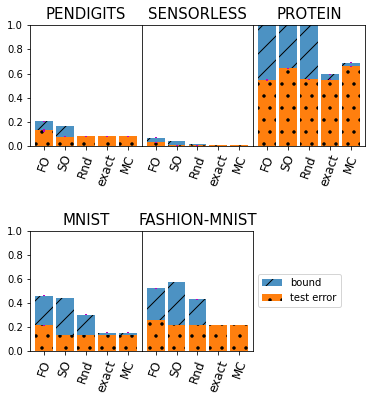

In [25]:
methods = ["FO", "SO", "Rnd", "exact", "MC"]
draw_bars(["PENDIGITS", "SENSORLESS", "PROTEIN", "MNIST", "FASHION-MNIST"])

In [11]:
for m in ["BayesianNB", "FO", "SO", "Rnd", "exact", "MC"]:
    line = f"& {m}"
    for d in ["PENDIGITS", "PROTEIN", "SHUTTLE", "SENSORLESS", "MNIST", "FASHION"]:
        e, es = results[d][m]["test-error"]
        line += f" & ${e*100:.2f} \pm {es*100:.2f}$ "
    print(line + r"\\")

& BayesianNB & $82.41 \pm 0.11$  & $82.09 \pm 0.00$  & $20.90 \pm 0.03$  & $86.27 \pm 0.21$  & $86.09 \pm 0.09$  & $89.14 \pm 0.05$ \\
& FO & $13.01 \pm 1.12$  & $54.51 \pm 0.69$  & $0.08 \pm 0.01$  & $2.94 \pm 0.12$  & $21.45 \pm 0.17$  & $25.94 \pm 0.22$ \\
& SO & $7.59 \pm 0.28$  & $64.15 \pm 0.39$  & $0.05 \pm 0.01$  & $0.41 \pm 0.06$  & $13.50 \pm 0.08$  & $21.67 \pm 0.14$ \\
& Rnd & $7.86 \pm 0.19$  & $55.24 \pm 0.47$  & $0.07 \pm 0.00$  & $0.43 \pm 0.05$  & $13.62 \pm 0.11$  & $21.80 \pm 0.07$ \\
& exact & $8.04 \pm 0.23$  & $55.00 \pm 0.78$  & $0.07 \pm 0.01$  & $0.46 \pm 0.05$  & $13.84 \pm 0.08$  & $21.90 \pm 0.05$ \\
& MC & $8.05 \pm 0.23$  & $65.91 \pm 0.26$  & $0.07 \pm 0.01$  & $0.45 \pm 0.04$  & $13.84 \pm 0.09$  & $21.90 \pm 0.05$ \\


In [13]:
for m in ["FO", "SO", "Rnd", "exact", "MC"]:
    line = f"& {m}"
    for d in ["PENDIGITS", "PROTEIN", "SHUTTLE", "SENSORLESS", "MNIST", "FASHION"]:
        e, es = results[d][m]["seeger"]
        line += f" & ${e*100:.2f} \pm {es*100:.2f}$ "
    print(line + r"\\")

& FO & $20.65 \pm 0.45$  & $112.29 \pm 0.46$  & $0.32 \pm 0.02$  & $6.80 \pm 0.26$  & $46.18 \pm 0.37$  & $52.12 \pm 0.16$ \\
& SO & $16.38 \pm 0.20$  & $139.81 \pm 0.23$  & $0.42 \pm 0.01$  & $3.82 \pm 0.06$  & $44.24 \pm 0.12$  & $57.09 \pm 0.08$ \\
& Rnd & $8.32 \pm 0.16$  & $122.92 \pm 0.41$  & $0.28 \pm 0.01$  & $1.29 \pm 0.05$  & $30.46 \pm 0.14$  & $42.93 \pm 0.12$ \\
& exact & $4.34 \pm 0.11$  & $59.28 \pm 0.60$  & $0.15 \pm 0.01$  & $0.67 \pm 0.03$  & $15.57 \pm 0.07$  & $21.83 \pm 0.06$ \\
& MC & $4.35 \pm 0.11$  & $69.10 \pm 0.19$  & $0.15 \pm 0.01$  & $0.66 \pm 0.03$  & $15.49 \pm 0.17$  & $21.83 \pm 0.06$ \\


In [4]:
bound = "seeger"
M = 100
depths = list(range(1, 11))

methods = ["FO", "SO", "Rnd", "exact", "MC"]

results = {}
for d in ["PENDIGITS", "PROTEIN", "SENSORLESS", "MNIST"]:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/all/{d}/{m}/{bound}")
        
        results[d][m] = {}
        for t in depths:
            
            try:
                path = next(load_dir.rglob(f"**/stochastic-bound=False/**/M={M}/**/max-depth={t}/**/err-b.npy"))
                results[d][m][t] = np.load(path, allow_pickle=True).item()
            except:
                print("Missing", load_dir, t)

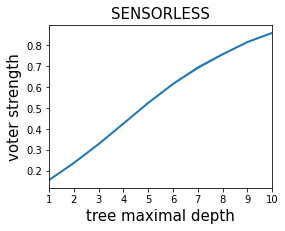

In [60]:
plt.figure(figsize=(4,3))
d = "SENSORLESS"
e = "strength"

strengths = [results[d]["exact"][t][e][0] for t in depths]
    
plt.plot(depths, strengths, linewidth=2)
plt.fill_between(depths, [results[d]["SO"][t][e][0] - results[d]["SO"][t][e][1] for t in depths], [results[d]["SO"][t][e][0] + results[d]["SO"][t][e][1] for t in depths], alpha=0.5)

plt.title(d, fontsize=15)
plt.xlim(1, 10)
plt.xticks(range(1, 11))
plt.xlabel("tree maximal depth", fontsize=15)
plt.ylabel("voter strength", fontsize=15)
    
plt.savefig(f"{d}-strength.pdf", bbox_inches="tight")

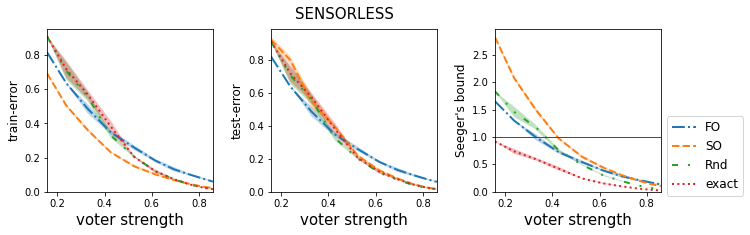

In [61]:
methods = ["FO", "SO", "Rnd", "exact"]
styles = ["-.", "--", (0, (3, 5, 1, 5, 1, 5)), ":", "-"]
plt.figure(figsize=(11,3))

x_min, x_max = min(strengths), max(strengths)
for j, e in enumerate(["train-error", "test-error", bound]):
    ax = plt.subplot(131 + j)

    for m, s in zip(methods, styles):
        y = np.array([results[d][m][t][e][0] for t in depths])
        err = np.array([results[d][m][t][e][1] for t in depths])

        plt.plot(strengths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(strengths, y-err, y+err, alpha=0.3)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
            plt.ylabel("Seeger's bound", fontsize=12)
        else:
            
            plt.ylabel(e, fontsize=12)
            
        plt.xlim(x_min, x_max)
        plt.xlabel("voter strength", fontsize=15)
        
    plt.ylim(0)
plt.suptitle(d, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.35)
    
plt.savefig(f"{d}-strength-stats.pdf", bbox_inches="tight")

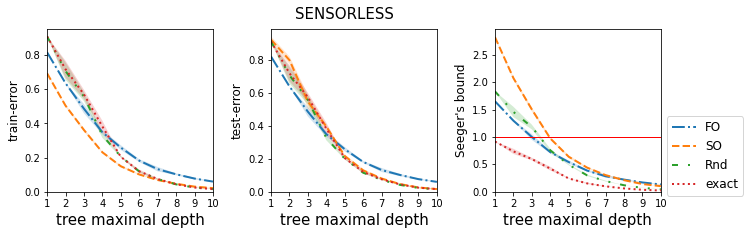

In [62]:
plt.figure(figsize=(11,3))

x_min, x_max = min(depths), max(depths)
for j, e in enumerate(["train-error", "test-error", bound]):
    ax = plt.subplot(131 + j)

    for m, s in zip(methods, styles):
        y = np.array([results[d][m][t][e][0] if isinstance(results[d][m][t][e], tuple) else results[d][m][t][e] for t in depths])
        err = np.array([results[d][m][t][e][1] if isinstance(results[d][m][t][e], tuple) else 0. for t in depths])

        plt.plot(depths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(depths, y-err, y+err, alpha=0.2)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
            plt.ylabel("Seeger's bound", fontsize=12)
        else:
            plt.ylabel(e, fontsize=12)
            
        plt.xlim(x_min, x_max)
        plt.xticks(range(1, 11))
        plt.xlabel("tree maximal depth", fontsize=15)
    plt.ylim(0)
plt.suptitle(d, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.35)
    
plt.savefig(f"{d}-depth-stats.pdf", bbox_inches="tight")

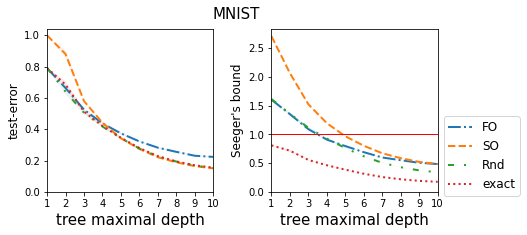

In [53]:
plt.figure(figsize=(7,3))

x_min, x_max = min(depths), max(depths)
for j, e in enumerate(["test-error", bound]):
    ax = plt.subplot(121 + j)

    for m, s in zip(methods, styles):
        y = np.array([results[d][m][t][e][0] if isinstance(results[d][m][t][e], tuple) else results[d][m][t][e] for t in depths])
        err = np.array([results[d][m][t][e][1] if isinstance(results[d][m][t][e], tuple) else 0. for t in depths])

        plt.plot(depths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(depths, y-err, y+err, alpha=0.1)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
            plt.ylabel("Seeger's bound", fontsize=12)
        else:
            plt.ylabel(e, fontsize=12)
            
        plt.xlim(x_min, x_max)
        plt.xticks(range(1, 11))
        plt.xlabel("tree maximal depth", fontsize=15)
    plt.ylim(0)
plt.suptitle(d, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.35)
    
plt.savefig(f"{d}-depth2.pdf", bbox_inches="tight")

In [5]:
M = 100
lr = 0.1
batch_size = 1024
priors = [0.1       ,   0.21544347,   0.46415888,   1        ,
         2.15443469,   4.64158883,  10        ,  21.5443469 ,
        46.41588834, 100]

bound = "seeger"

datasets = ["PROTEIN", "SENSORLESS", "SHUTTLE", "MNIST"]

results = {d: {} for d in datasets}

method = "MC"
for d in datasets:
    
    results[d][method] = {}
    for p in priors:
        load_dir = Path(f"../results/all/{d}/")
        path = next(load_dir.rglob(f"**/max-depth=None/**/prior={p}/lr={lr}/batch-size={batch_size}/MC=10/err-b.npy"))
        results[d][method][p] = np.load(path, allow_pickle=True).item()        
    
    load_dir = Path(f"../results/all/{d}/Rnd/{bound}/optimize-bound=True/stochastic-bound=False/rf/M={M}/")
    path = next(load_dir.rglob(f"max-depth=None/prior=1/**/err-b.npy"))
    results[d]["Rnd"] = np.load(path, allow_pickle=True).item() 
    
    load_dir = Path(f"../results/all/{d}/FO/{bound}/optimize-bound=True/stochastic-bound=False/rf/M={M}/")
    path = next(load_dir.rglob(f"max-depth=None/prior=1/**/err-b.npy"))
    results[d]["FO"] = np.load(path, allow_pickle=True).item() 
    
    load_dir = Path(f"../results/all/{d}/SO/{bound}/optimize-bound=True/stochastic-bound=False/rf/M={M}/")
    path = next(load_dir.rglob(f"max-depth=None/prior=1/**/err-b.npy"))
    results[d]["SO"] = np.load(path, allow_pickle=True).item() 

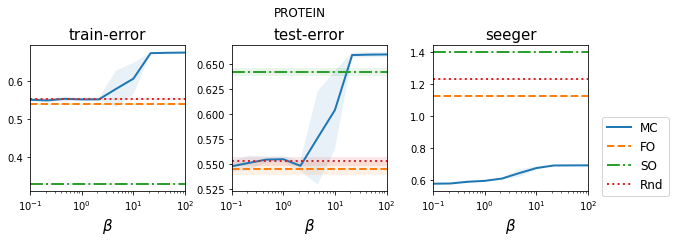

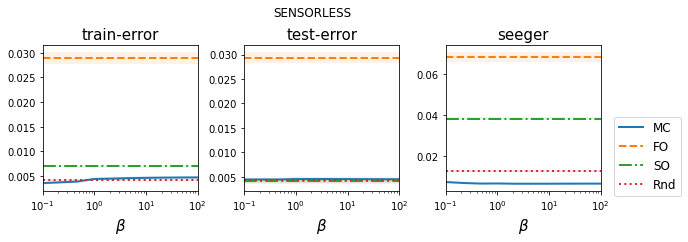

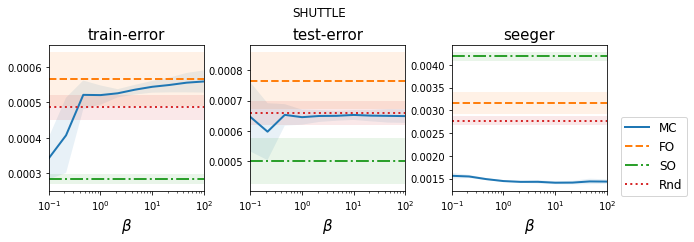

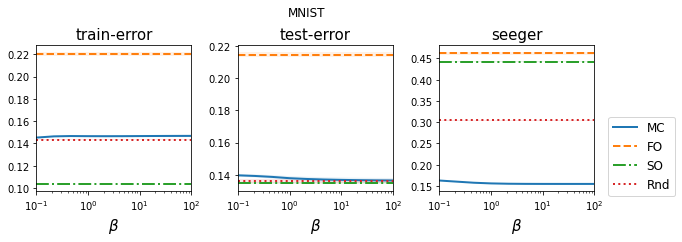

In [6]:

methods = ["FO", "SO", "Rnd"]
styles = ["--", "-.", ":"]

for d in datasets:
    plt.figure(figsize=(10,3))

    x_min, x_max = min(priors), max(priors)
    for j, e in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)

        y = np.array([results[d]["MC"][p][e][0] for p in priors])
        err = np.array([results[d]["MC"][p][e][1] for p in priors])

        plt.plot(priors, y, label="MC", linestyle="-", linewidth=2)
        plt.fill_between(priors, y-err, y+err, alpha=0.1)

        for m, s in zip(methods, styles):
            y = np.array([results[d][m][e][0] for p in priors])
            err = np.array([results[d][m][e][1] for p in priors])

            plt.plot(priors, y, label=m, linestyle=s, linewidth=2)
            plt.fill_between(priors, y-err, y+err, alpha=0.1)

        plt.xlim(x_min, x_max)
        plt.xlabel(r"$\beta$", fontsize=15)
        plt.title(e, fontsize=15)
        plt.xscale("log")
    
    plt.legend(bbox_to_anchor=(1.05, 0.55), fontsize=12)   
    plt.subplots_adjust(wspace=0.3, top=0.8)
    
    plt.suptitle(d, fontsize=12)
    plt.savefig(f"{d}-prior.pdf", bbox_inches="tight")